In [11]:
# import statements 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read the csv file 
df = pd.read_csv('../data/raw/TechChallenge_Data.csv')
df.head() 

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [13]:
# Explore data
df.info()       
df.describe()   
df.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   9999 non-null   object 
 1   AustralianPort          9999 non-null   object 
 2   ForeignPort             9999 non-null   object 
 3   Country                 9999 non-null   object 
 4   Passengers_In           9999 non-null   int64  
 5   Freight_In_(tonnes)     9999 non-null   float64
 6   Mail_In_(tonnes)        9999 non-null   float64
 7   Passengers_Out          9999 non-null   int64  
 8   Freight_Out_(tonnes)    9999 non-null   float64
 9   Mail_Out_(tonnes)       9999 non-null   float64
 10  Passengers_Total        9999 non-null   int64  
 11  Freight_Total_(tonnes)  9999 non-null   float64
 12  Mail_Total_(tonnes)     9999 non-null   float64
 13  Year                    9999 non-null   int64  
 14  Month_num               9999 non-null   

Month                     0
AustralianPort            0
ForeignPort               0
Country                   0
Passengers_In             0
Freight_In_(tonnes)       0
Mail_In_(tonnes)          0
Passengers_Out            0
Freight_Out_(tonnes)      0
Mail_Out_(tonnes)         0
Passengers_Total          0
Freight_Total_(tonnes)    0
Mail_Total_(tonnes)       0
Year                      0
Month_num                 0
dtype: int64

In [14]:
# Make another column for each possible route 
df['Route'] = df['AustralianPort'] + " to " + df['ForeignPort']

In [15]:
# Make another column for the Date
df["Date"] = pd.to_datetime(
    dict(year=df["Year"], month=df["Month_num"], day=1))

In [16]:
# save cleaned csv 
output_path = "../data/cleaned/air_traffic_clean.csv"
df.to_csv(output_path, index=False)

In [17]:
# Sum total passengers per route
route_passengers = df.groupby("Route")["Passengers_Total"].sum()

# Most trafficked (top 10)
most_used_routes = route_passengers.sort_values(ascending=False).head(10)
print("The Most Trafficked Routes Are:")
print(most_used_routes)

# Least trafficked (bottom 10)
least_used_routes = route_passengers.sort_values(ascending=True).head(10)
print("\nThe Least Trafficked Routes Are:")
print(least_used_routes)


The Most Trafficked Routes Are:
Route
Sydney to Auckland        2961212
Sydney to Singapore       1440018
Sydney to Tokyo           1292116
Sydney to Hong Kong       1151900
Perth to Singapore         952926
Brisbane to Auckland       893246
Sydney to Christchurch     882357
Melbourne to Singapore     865251
Sydney to Los Angeles      862964
Sydney to Honolulu         861814
Name: Passengers_Total, dtype: int64

The Least Trafficked Routes Are:
Route
Melbourne to Denver             0
Brisbane to Colombo             0
Brisbane to Chicago             0
Perth to Bandar Seri Begawan    0
Adelaide to Harare              0
Townsville to San Francisco     1
Cairns to Honiara               1
Darwin to Zagreb                1
Hobart to Tokyo                 1
Hobart to Los Angeles           2
Name: Passengers_Total, dtype: int64


In [18]:
# Passenger Traffic Trends

# only graph the data that is given 
cutoff_date = "1989-01-01" 
df_full = df[df["Date"] < cutoff_date]

monthly_passengers = df_full.groupby("Date")["Passengers_Total"].sum()



print(monthly_passengers.head())


Date
1985-01-01    472565
1985-02-01    384175
1985-03-01    441095
1985-04-01    397076
1985-05-01    423252
Name: Passengers_Total, dtype: int64


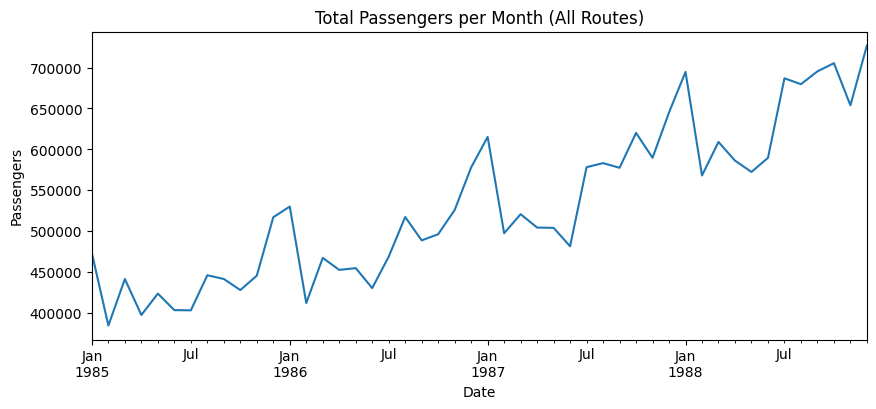

In [19]:
plt.figure(figsize=(10,4))
monthly_passengers.plot()
plt.title("Total Passengers per Month (All Routes)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.show()

/var/folders/hx/fk68477s3096pwy_7thf3w2c0000gn/T/ipykernel_12124/1056299225.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_trends = df_full[df["Country"].isin(top_countries)].groupby(["Date","Country"])["Passengers_Total"].sum().reset_index()


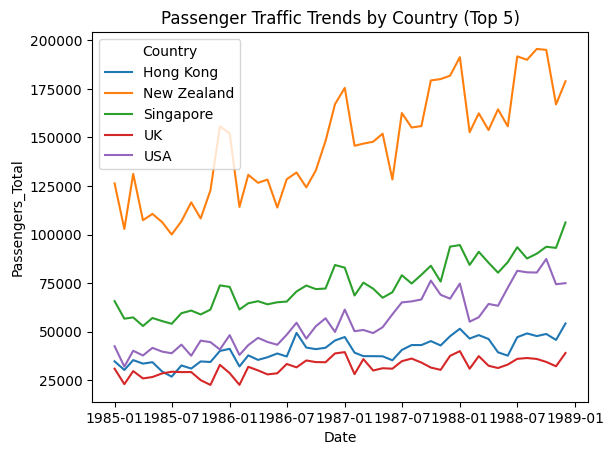

In [ ]:
# Total passengers by country over time 
top_countries = df_full.groupby("Country")["Passengers_Total"].sum().sort_values(ascending=False).head(5).index
country_trends = df_full[df["Country"].isin(top_countries)].groupby(["Date","Country"])["Passengers_Total"].sum().reset_index()

sns.lineplot(data=country_trends, x="Date", y="Passengers_Total", hue="Country")
plt.title("Passenger Traffic Trends by Country (Top 5)")
plt.show() 
 

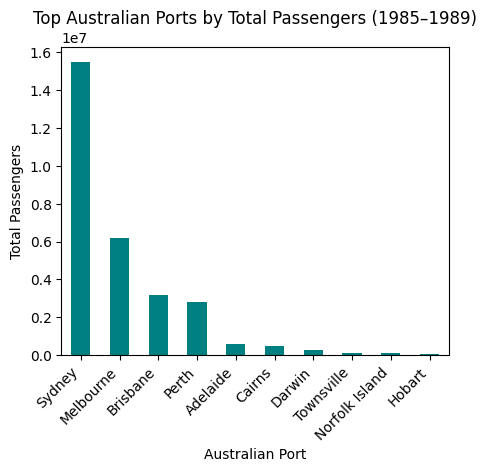

In [21]:
# Total passengers by Australian Port
port_totals = (
    df.groupby("AustralianPort")["Passengers_Total"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(5,4))
port_totals.plot(kind="bar", color="teal")
plt.title("Top Australian Ports by Total Passengers (1985–1989)")
plt.xlabel("Australian Port")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45, ha="right")
plt.show()
